In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ECE_PROJECT/

/content/drive/MyDrive/ECE_PROJECT


In [4]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, \
confusion_matrix

In [ ]:
train_imgs_flattened = np.load('saved_params/train_images_flattened.npy')
validation_imgs_flattened = np.load(
    'saved_params/validation_imgs_flattened.npy')
test_imgs_flattened = np.load('saved_params/test_imgs_flattened.npy')

train_labels = np.load('saved_params/labels.npy')
validation_labels = np.load('saved_params/validation_labels.npy')
test_labels = np.load('saved_params/test_labels.npy')

In [5]:
data = np.load('saved_params/pca_data_with_label.npz')
X_train_pca = data['X_train_pca']
X_valid_pca = data['X_valid_pca']
y_train = data['y_train']
y_valid = data['y_valid']

test_data = np.load('saved_params/test_pca_data_with_label.npz')
test_pca = test_data['test_pca']
test_labels = test_data['test_labels']

In [6]:
print(X_train_pca.shape)
print(X_valid_pca.shape)
print(test_pca.shape)

(23056, 257)
(5765, 257)
(7066, 257)


In [37]:
k_range = range(2, 25)
scores = {}

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)
    y_pred = knn.predict(X_valid_pca)
    error_rate = np.mean(y_pred != y_valid)

    scores[k] = error_rate
    print(f"K: {k}, Error Rate: {error_rate:.4f}")

K: 2, Error Rate: 0.6711
K: 3, Error Rate: 0.6725
K: 4, Error Rate: 0.6718
K: 5, Error Rate: 0.6727
K: 6, Error Rate: 0.6777
K: 7, Error Rate: 0.6796
K: 8, Error Rate: 0.6822
K: 9, Error Rate: 0.6836
K: 10, Error Rate: 0.6855
K: 11, Error Rate: 0.6878
K: 12, Error Rate: 0.6874
K: 13, Error Rate: 0.6916
K: 14, Error Rate: 0.6888
K: 15, Error Rate: 0.6938
K: 16, Error Rate: 0.6919
K: 17, Error Rate: 0.6921
K: 18, Error Rate: 0.6909
K: 19, Error Rate: 0.6945
K: 20, Error Rate: 0.6916
K: 21, Error Rate: 0.6892
K: 22, Error Rate: 0.6885
K: 23, Error Rate: 0.6892
K: 24, Error Rate: 0.6879


In [28]:
def plot_error_rate_vs_k(k_range, scores):
    plt.plot(k_range, scores.values())
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.title('Error Rate vs. K')
    plt.show()

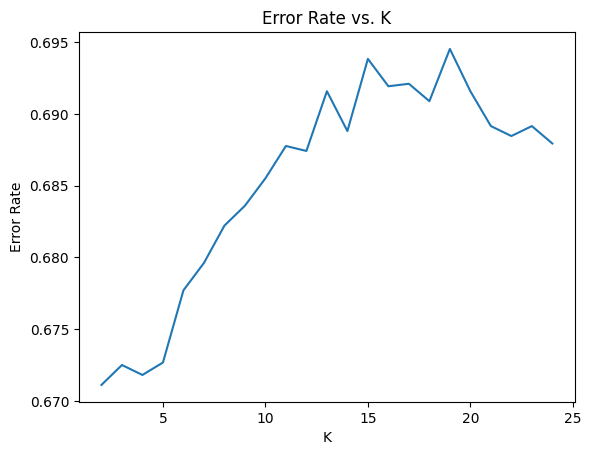

In [29]:
plot_error_rate_vs_k(k_range, scores)

In [42]:
best_k = 4
knn = KNeighborsClassifier(n_neighbors=best_k)

In [43]:
knn.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=4)

In [40]:
y_pred = knn.predict(X_valid_pca)

print(accuracy_score(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

0.3222896790980052
              precision    recall  f1-score   support

           0       0.25      0.26      0.26       805
           1       0.20      0.25      0.22        80
           2       0.27      0.25      0.26       824
           3       0.36      0.48      0.41      1397
           4       0.30      0.36      0.32      1023
           5       0.33      0.17      0.22       998
           6       0.49      0.33      0.40       638

    accuracy                           0.32      5765
   macro avg       0.31      0.30      0.30      5765
weighted avg       0.33      0.32      0.32      5765



In [33]:
joblib.dump(knn, 'saved_params/knn_model.joblib')

['saved_params/knn_model.joblib']

In [34]:
knn = joblib.load('saved_params/knn_model.joblib')

**Evaluate Model**

In [41]:
y_test_pred = knn.predict(test_pca)

accuracy = accuracy_score(test_labels, y_test_pred)
print(f"Model accuracy: {accuracy:.2f}")

class_report = classification_report(test_labels, y_test_pred)
print("Classification Report:")
print(class_report)

conf_matrix = confusion_matrix(test_labels, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model accuracy: 0.34
Classification Report:
              precision    recall  f1-score   support

           0       0.23      0.34      0.28       960
           1       0.41      0.33      0.37       111
           2       0.29      0.28      0.29      1018
           3       0.42      0.47      0.45      1825
           4       0.29      0.26      0.27      1216
           5       0.32      0.23      0.27      1139
           6       0.45      0.37      0.40       797

    accuracy                           0.34      7066
   macro avg       0.35      0.33      0.33      7066
weighted avg       0.34      0.34      0.34      7066

Confusion Matrix:
[[324   4  98 244 130 106  54]
 [ 18  37   8  19  14   7   8]
 [184  11 289 205 124 105 100]
 [318  15 178 862 218 145  89]
 [219  10 153 310 316 143  65]
 [244  12 143 245 188 267  40]
 [ 83   1 118 144 101  58 292]]
